In [15]:
using CSV, DataFrames, Statistics
include("../../src/dataStructuring.jl")
using ProgressMeter
using .DataStructuring
using CairoMakie
using StatsBase

In [17]:
## ====================== Data Analysis =====================

variableSaturation = false

df = DataFrame(CSV.File("../../Data/ALLvariants_exclSynonymous_Xadj.txt"))
Nf = 2E5
dfVid = DataStructuring.analyseVariants(df, Nf; competitionSaturate=variableSaturation)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:29


,_t,vaf_t,pid
,Array…,Array…,Int64
1,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0013, 0.0006, 0.0, 0.0007, 0.0143]",260
2,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0, 0.00155, 0.02915, 0.0562]",260
3,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.3, 0.32235, 0.35725, 0.37775, 0.3896]",260
4,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0008, 0.0061, 0.116, 0.0158]",260
5,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0008, 0.002, 0.0134, 0.2922]",260
6,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0, 0.0, 0.02, 0.0166]",260
7,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0611, 0.046, 0.0256, 0.0042, 0.0]",260
8,"[61.63, 64.62, 68.43, 71.54, 75.83]","[0.0069, 0.0029, 0.0035, 0.0032, 0.0011]",284
9,"[92.51, 95.63, 100.84]","[0.0196, 0.0324, 0.0748]",737


Before fitting, let us first look at the distribution of rank correlations:

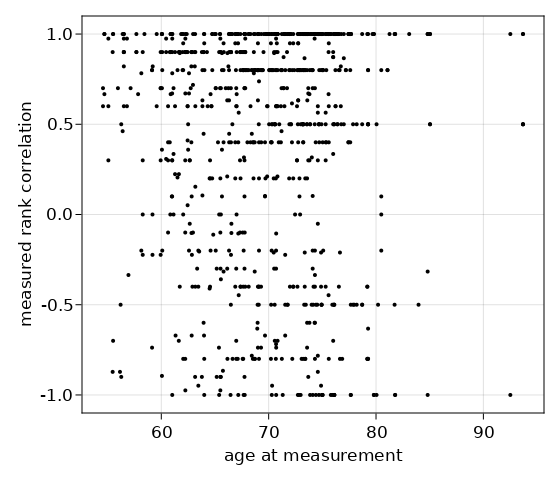

In [7]:
## ----------------- Rank correlation per variant -------------

rscale = 0.8
fig2 = Figure(
    resolution=(rscale*700,rscale*600),
    fontsize=17,
)
grThreshold = 3
_timeMask = [dfVCur[:_t][1]<90 for dfVCur in eachrow(dfVid)]

Axis(
    fig2[1,1],
    xlabel="age at measurement",
    ylabel="measured rank correlation",
)
scatter!(
    [dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid[!,:])],
    dfVid[!, :ρ],
    color=:black,
    markersize=4,
)
display(fig2)

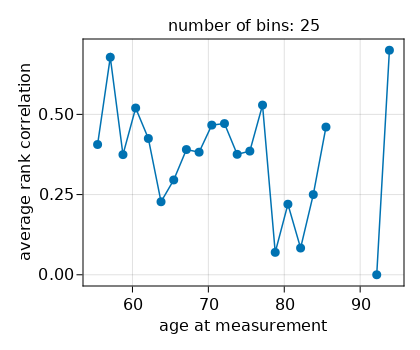

In [28]:
## ------------- Mean rank correlation over time ---------------
bins = 25
_tBin, ρAv_tBin = DataStructuring.meanVarFitParamTime([dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid[!,:])], dfVid[!, :ρ]; bins)
rscale=0.7
res = (rscale*600,rscale*500)
fsize=16
fig3a = Figure(resolution=res, fontsize=fsize)
Axis(
    fig3a[1,1],
    xlabel="age at measurement",
    ylabel="average rank correlation",
    title="number of bins: "*string(bins)
)
scatterlines!(_tBin, ρAv_tBin)
display(fig3a)

Another possibly interesting quantity we haven't looked at yet is the mean variant size over time:

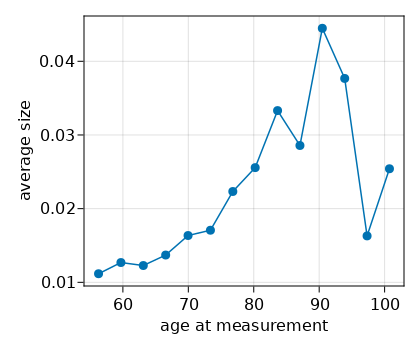

In [11]:
## -------------- Mean variant size over time ----------------
import Base.Iterators.flatten
bins = 15

x_sid = [x for x in flatten([dfVidCur[:vaf_t] for dfVidCur in eachrow(dfVid)])]
t_sid = [t for t in flatten([dfVidCur[:_t] for dfVidCur in eachrow(dfVid)])]
_tBin, xAv_tBin = DataStructuring.meanVarFitParamTime(t_sid, x_sid; bins)

rscale=0.7
res = (rscale*600,rscale*500)
fsize=16
fig3a = Figure(resolution=res, fontsize=fsize)
Axis(
    fig3a[1,1],
    xlabel="age at measurement",
    ylabel="average size",
)
scatterlines!(_tBin, xAv_tBin)
display(fig3a)

For fitting, first let us look at fits to the regular logistic function (using the new global minimization algorithm), which grows from $1/2N$ to $0.5$.

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


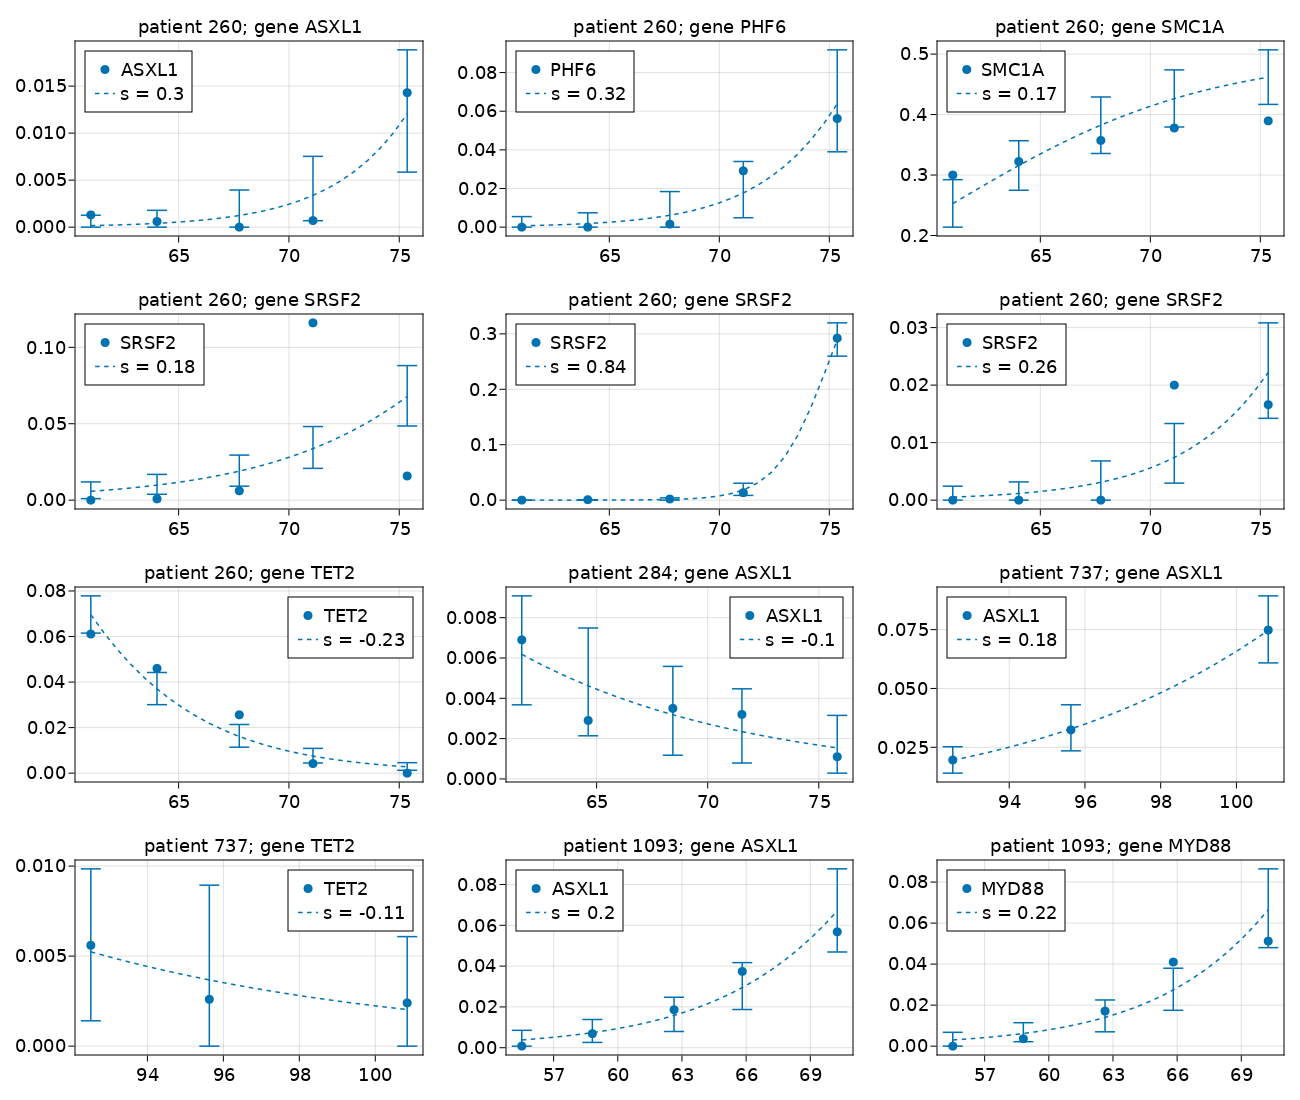

In [18]:
# rscale=0.7
res = (1300,1100)
fsize=18
fig0 = Figure(resolution=res, fontsize=fsize)
@showprogress for (i,dfVCur) in enumerate(eachrow(dfVid[1:12,:]))
    col = (i-1) % 3 + 1
    row = floor((i-1)/3) + 1 |> Int
    ax = Axis(
        fig0[row,col],
        title="patient "*string(dfVCur[:pid])*"; gene "*dfVCur[:gene],
    )
    scatter!(dfVCur[:_t], dfVCur[:vaf_t],
        linestyle=:solid,
        label=dfVCur[:gene],
    )
    lines!(dfVCur[:_tt], dfVCur[:vafTh_tt],
        linestyle=:dash,
        label="s = "*string(round(dfVCur[:γ],digits=2)),
    )
    rangebars!(
        dfVCur[:_t], dfVCur[:vafThQl_t], dfVCur[:vafThQu_t],
        whiskerwidth = 20,
        cycle = [:color],
    )
    legendpos = ( dfVCur[:ρ]>0 ? :lt : :rt )
    axislegend(position=legendpos)
end
display(fig0)

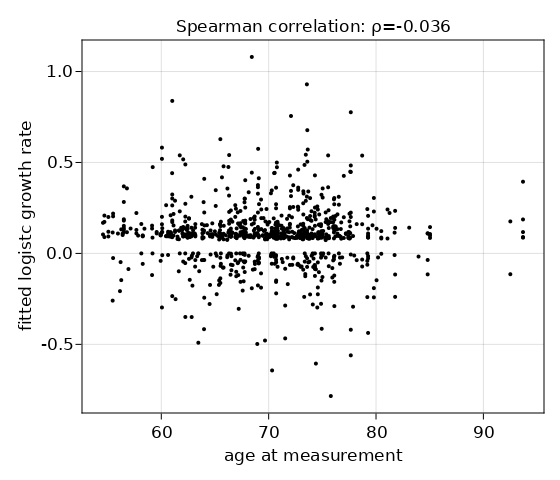

In [19]:
rscale = 0.8
fig2 = Figure(
    resolution=(rscale*700,rscale*600),
    fontsize=17,
)
grThreshold = 11
_timeMask = [dfVCur[:_t][1]<90 for dfVCur in eachrow(dfVid)]
_λMask = [dfVCur[:γ]<grThreshold for dfVCur in eachrow(dfVid)]
ρS = corspearman([dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid[_λMask,:])], dfVid[_λMask, :γ])
Axis(
    fig2[1,1],
    xlabel="age at measurement",
    ylabel="fitted logistc growth rate",
    title="Spearman correlation: ρ="*string(round(ρS,digits=3))
)
scatter!(
    [dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid[_λMask,:])],
    dfVid[_λMask, :γ],
    color=:black,
    markersize=4,
)
# ylims!(-1,1)
display(fig2)

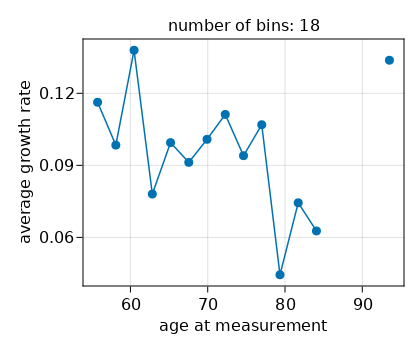

In [21]:
## --------- mean growth rates over time ----------
bins = 18
_tBin, λAv_tBin = DataStructuring.meanVarFitParamTime([dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid[_λMask,:])], dfVid[_λMask, :γ]; bins)

rscale=0.7
res = (rscale*600,rscale*500)
fsize=16
fig3a = Figure(resolution=res, fontsize=fsize)
Axis(
    fig3a[1,1],
    xlabel="age at measurement",
    ylabel="average growth rate",
    title="number of bins: "*string(bins)
)
scatterlines!(_tBin, λAv_tBin)
display(fig3a)


## Saturating logistic

Let us now move to the case of a logistic function which may saturate lower that 0.5:

In [23]:
Nf = 2E5
dfSatVid = DataStructuring.analyseVariants(df, Nf; competitionSaturate=true)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:40


,_t,vaf_t,pid
,Array…,Array…,Int64
1,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0013, 0.0006, 0.0, 0.0007, 0.0143]",260
2,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0, 0.00155, 0.02915, 0.0562]",260
3,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.3, 0.32235, 0.35725, 0.37775, 0.3896]",260
4,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0008, 0.0061, 0.116, 0.0158]",260
5,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0008, 0.002, 0.0134, 0.2922]",260
6,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0, 0.0, 0.02, 0.0166]",260
7,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0611, 0.046, 0.0256, 0.0042, 0.0]",260
8,"[61.63, 64.62, 68.43, 71.54, 75.83]","[0.0069, 0.0029, 0.0035, 0.0032, 0.0011]",284
9,"[92.51, 95.63, 100.84]","[0.0196, 0.0324, 0.0748]",737


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


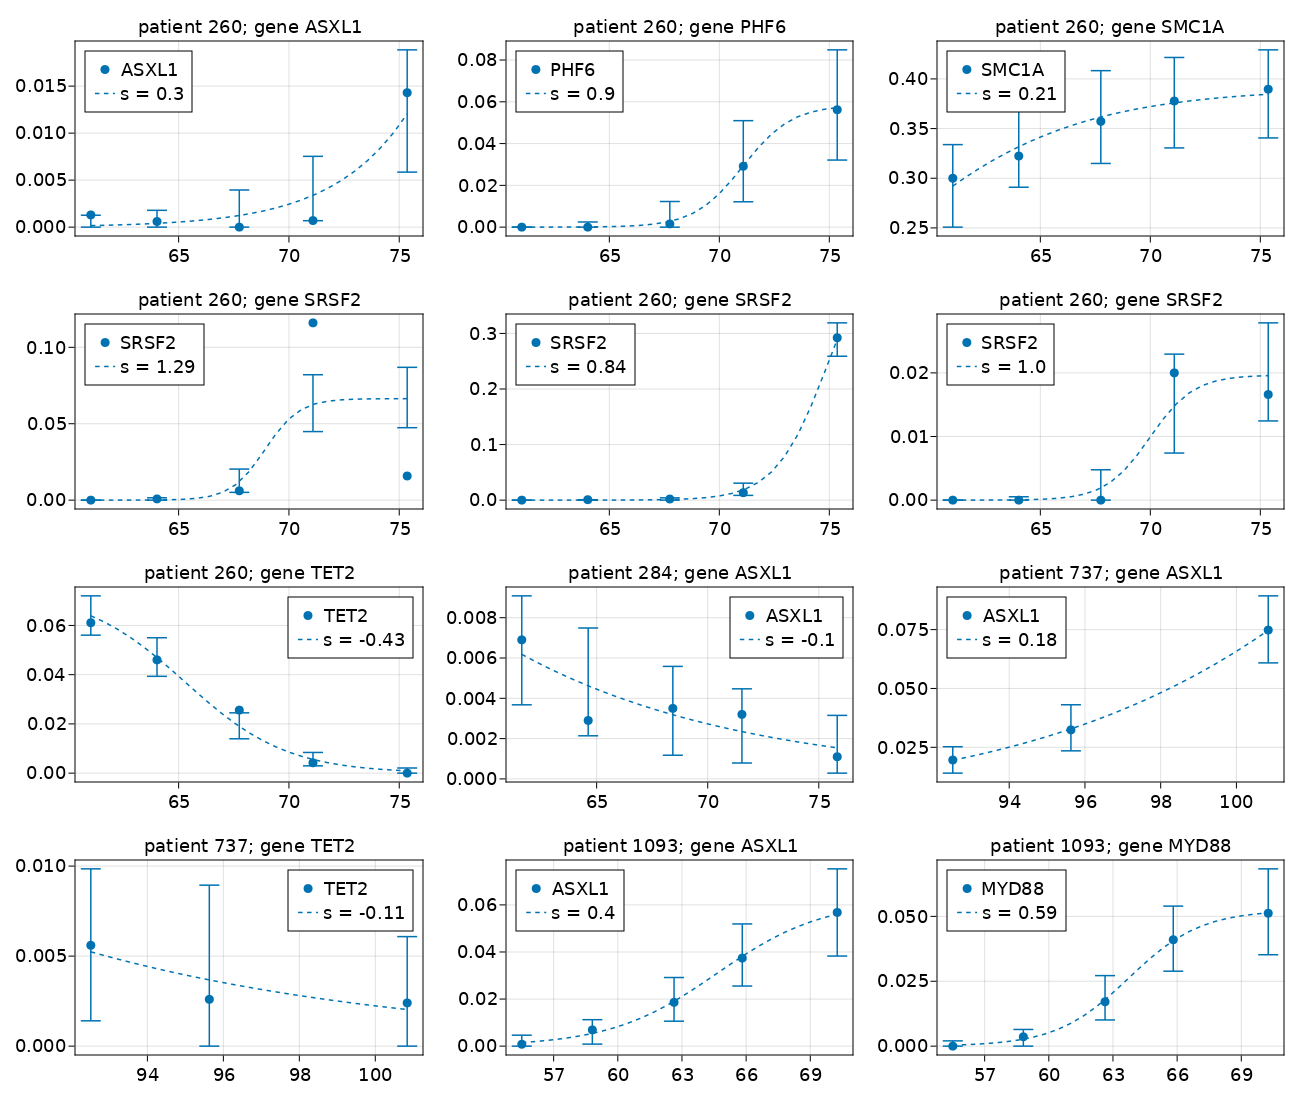

In [24]:
## ----------- Multiple data curves per variant in single plot ----------

# rscale=0.7
res = (1300,1100)
fsize=18
fig0 = Figure(resolution=res, fontsize=fsize)
@showprogress for (i,dfVCur) in enumerate(eachrow(dfSatVid[1:12,:]))
    col = (i-1) % 3 + 1
    row = floor((i-1)/3) + 1 |> Int
    ax = Axis(
        fig0[row,col],
        title="patient "*string(dfVCur[:pid])*"; gene "*dfVCur[:gene],
    )
    scatter!(dfVCur[:_t], dfVCur[:vaf_t],
        linestyle=:solid,
        label=dfVCur[:gene],
    )
    lines!(dfVCur[:_tt], dfVCur[:vafTh_tt],
        linestyle=:dash,
        label="s = "*string(round(dfVCur[:γ],digits=2)),
    )
    rangebars!(
        dfVCur[:_t], dfVCur[:vafThQl_t], dfVCur[:vafThQu_t],
        whiskerwidth = 20,
        cycle = [:color],
    )
    legendpos = ( dfVCur[:ρ]>0 ? :lt : :rt )
    axislegend(position=legendpos)
end
display(fig0)

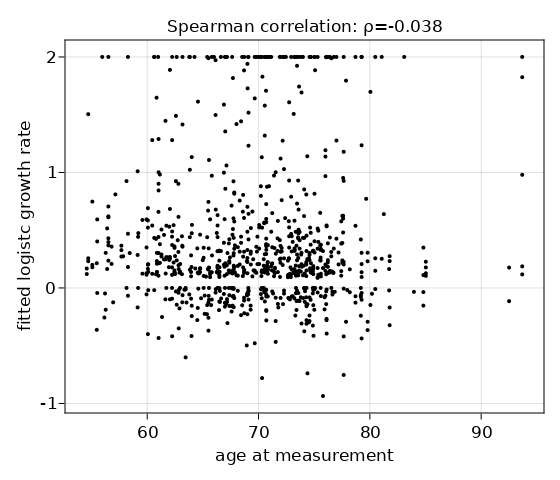

In [25]:
## ---------- Fitted Growth rates -----------

rscale = 0.8
fig2 = Figure(
    resolution=(rscale*700,rscale*600),
    fontsize=17,
)
grThreshold = 11
_timeMask = [dfVCur[:_t][1]<90 for dfVCur in eachrow(dfSatVid)]
_λMask = [dfVCur[:γ]<grThreshold for dfVCur in eachrow(dfSatVid)]
ρS = corspearman([dfVidCur[:_t][1] for dfVidCur in eachrow(dfSatVid[_λMask,:])], dfSatVid[_λMask, :γ])
Axis(
    fig2[1,1],
    xlabel="age at measurement",
    ylabel="fitted logistc growth rate",
    title="Spearman correlation: ρ="*string(round(ρS,digits=3))
)
scatter!(
    [dfVidCur[:_t][1] for dfVidCur in eachrow(dfSatVid[_λMask,:])],
    dfSatVid[_λMask, :γ],
    color=:black,
    markersize=4,
)
# ylims!(-1,1)
display(fig2)